In [223]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import os
import sys

In [224]:
homedir = os.getenv('HOME')
cwd = homedir+'/Desktop/summer2023/data/'
os.chdir(cwd)

## z0MGS SFR vs. Stellar Mass

In [225]:
filepath=cwd+'z0MGS_data.csv'
mytab=Table.read(filepath)

In [226]:
newmass=[]
newsfr=[]
rejected=[]

for i in mytab:
    # removes data that has null for a value entry,
    # we only want to use data that has real values
    if 'null' in i['logmass'] or 'null' in i['logsfr']:
        rejected.append(i)
    else:
        # appends new, safe data and converts values to floats for plot 
        newmass.append(float(i['logmass']))
        newsfr.append(float(i['logsfr']))
# tests new arrays to see if the filter was done correctly
print(len(newmass)==len(newsfr))

True


Text(0.5, 1.0, 'SFR vs. Mass; log-scale')

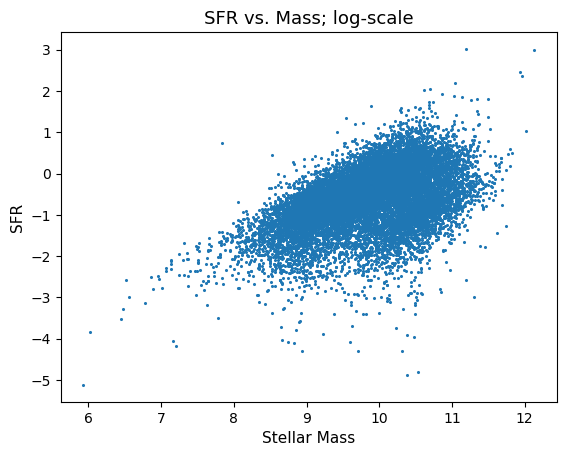

In [227]:
plt.figure()
plt.scatter(newmass,newsfr,s=1.5)
plt.xlabel('Stellar Mass',fontsize=11); plt.ylabel('SFR',fontsize=11); plt.title('SFR vs. Mass; log-scale',fontsize=13)

## Matched z0MGS,A100 Mass Ratio plotted as a function of Stellar Mass

In [228]:
# we needed to use galaxies in the A100 catalog and z0MGS catalog
# TOPCAT was used to pick which galaxies were in both, filtered by their name
matchedfilepath=cwd+'matched.csv'
mymatchedtab=Table.read(matchedfilepath)

In [229]:
newSFR=[]
newmass=[]
newHI=[]

for i in mymatchedtab:
    if 'null' in i['logsfr']:
        rejected.append(i)
    else:
        newmass.append(i['logmass'])
        newHI.append(i['logMH'])
        newSFR.append(float(i['logsfr']))
len(newSFR)==len(newmass)==len(newHI)

True

In [230]:
massratios=[]
# computes the ratio of HI mass to stellar mass
for i in range(len(newSFR)):
    ratio=newHI[i]/newmass[i]
    massratios.append(ratio)

Text(0.5, 1.0, 'HI Gas Mass/Stellar mass as a funtion of Stellar Mass; log-scale')

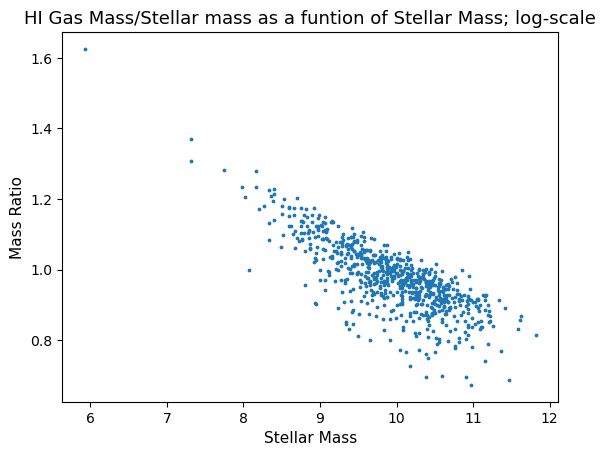

In [231]:
plt.figure()
plt.scatter(newmass,massratios,s=3)
plt.xlabel('Stellar Mass',fontsize=11); plt.ylabel('Mass Ratio',fontsize=11)
plt.title('HI Gas Mass/Stellar mass as a funtion of Stellar Mass; log-scale',fontsize=13)

## Matched z0MGS,A100 Mass Ratio as a function of SFR/Stellar Mass

In [232]:
# already have mass ratios from previous part, all that is left is SFR/Mass

In [233]:
SFRmassratios=[]
# calculates the specific star formation rate
for i in range(len(newSFR)):
    ratio=newSFR[i]/newmass[i]
    SFRmassratios.append(ratio)

Text(0.5, 1.0, 'Mass Ratio as a function of Stellar Formation Rate; log-scale')

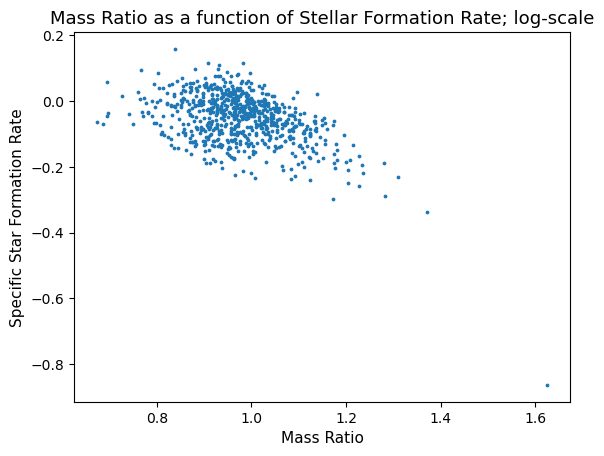

In [234]:
plt.figure()
plt.scatter(massratios,SFRmassratios,s=3)
plt.xlabel('Mass Ratio',fontsize=11); plt.ylabel('Specific Star Formation Rate',fontsize=11)
plt.title('Mass Ratio as a function of Stellar Formation Rate; log-scale',fontsize=13)